In [16]:
import numpy as np
import pandas as pd
from scipy.cluster.vq import kmeans,vq, whiten
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [24]:
iris = pd.read_csv('https://raw.githubusercontent.com/Thinkful-Ed/curric-data-001-data-sets/master/iris/iris.data.csv',
                  names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class'], header = None)
X = np.loadtxt()

In [25]:
X.head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [26]:
##### cluster data into K=1..10 clusters #####
X = whiten(X)
K = range(1,10)

# scipy.cluster.vq.kmeans
KM = [kmeans(X,k) for k in K]
centroids = [cent for (cent,var) in KM]   # cluster centroids
#avgWithinSS = [var for (cent,var) in KM] # mean within-cluster sum of squares

In [28]:
# alternative: scipy.cluster.vq.vq
#Z = [vq(X,cent) for cent in centroids]
#avgWithinSS = [sum(dist)/X.shape[0] for (cIdx,dist) in Z]

In [29]:
# alternative: scipy.spatial.distance.cdist
D_k = [cdist(X, cent, 'euclidean') for cent in centroids]
cIdx = [np.argmin(D,axis=1) for D in D_k]
dist = [np.min(D,axis=1) for D in D_k]
avgWithinSS = [sum(d)/X.shape[0] for d in dist]

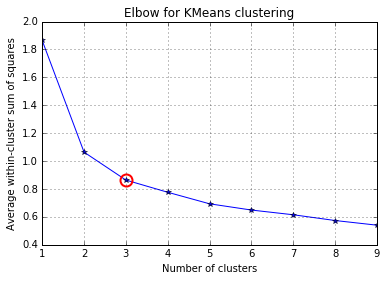

In [30]:
##### plot ###
kIdx = 2

# elbow curve
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(K, avgWithinSS, 'b*-')
ax.plot(K[kIdx], avgWithinSS[kIdx], marker='o', markersize=12, 
    markeredgewidth=2, markeredgecolor='r', markerfacecolor='None')
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('Average within-cluster sum of squares')
plt.title('Elbow for KMeans clustering')

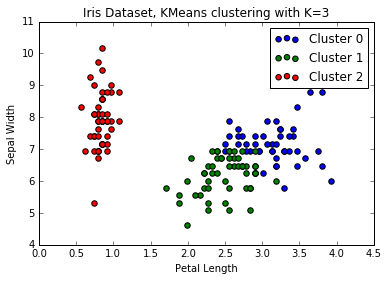

In [31]:
# scatter plot
fig = plt.figure()
ax = fig.add_subplot(111)
#ax.scatter(X[:,2],X[:,1], s=30, c=cIdx[k])
clr = ['b','g','r','c','m','y','k']
for i in range(K[kIdx]):
    ind = (cIdx[kIdx]==i)
    ax.scatter(X[ind,2],X[ind,1], s=30, c=clr[i], label='Cluster %d'%i)
plt.xlabel('Petal Length')
plt.ylabel('Sepal Width')
plt.title('Iris Dataset, KMeans clustering with K=%d' % K[kIdx])
plt.legend()

plt.show()